Una vez obtenido los resultados de ejecutar nuestras métricas en los resultados del dataset de prueba, vamos a sacar la distribución que tienen estos datos

In [1]:
import torch
import csv

import matplotlib.pyplot as plt

In [2]:
MSE_data_list = []
LPIPS_data_list = []

with open("Base_data.csv","r") as file:

    reader = csv.reader(file)

    for row in reader:
        if row[0] == "MSE_data":
            MSE_data_list.append([float(item) for item in row[1:]])
        
        elif row[0] == "LPIPS_data":
            LPIPS_data_list.append([float(item) for item in row[1:]])

        else:
            raise ValueError("No se encuentra el nombre del tipo de dato en la primera columna")

In [3]:
MSE_data = [torch.Tensor(row) for row in MSE_data_list]
LPIPS_data = [torch.Tensor(row) for row in LPIPS_data_list]


Tras haber recuperado los datos, toca realizar los cálculos

In [6]:
# MSE_distributions = []

# for row in MSE_data:

#     MSE_distributions.append((row.mean().item(),row.std().item()))

MSE_distributions = [(row.mean().item(),row.std().item()) for row in MSE_data]

# LPIPS_distributions = []

# for row in LPIPS_data:

#     LPIPS_distributions.append((row.mean().item(),row.std().item()))

LPIPS_distributions = [(row.mean().item(),row.std().item()) for row in LPIPS_data]

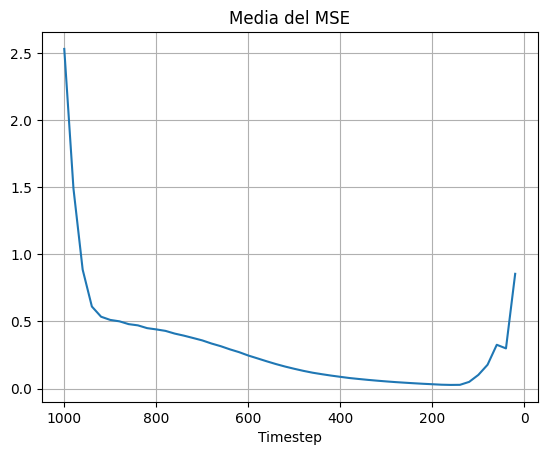

In [20]:
plt.plot(range(len(MSE_distributions*20),0,-20),[x[0] for x in MSE_distributions])
plt.title("Media del MSE")

plt.xlabel("Timestep")
plt.gca().invert_xaxis()
plt.grid()

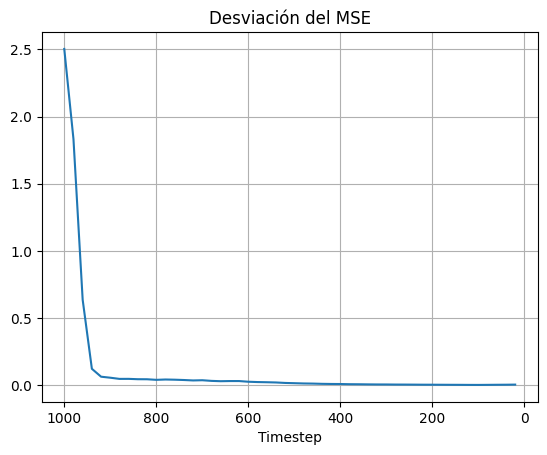

In [21]:
plt.plot(range(len(MSE_distributions*20),0,-20),[x[1] for x in MSE_distributions])

plt.title("Desviación del MSE")

plt.xlabel("Timestep")
plt.gca().invert_xaxis()
plt.grid()

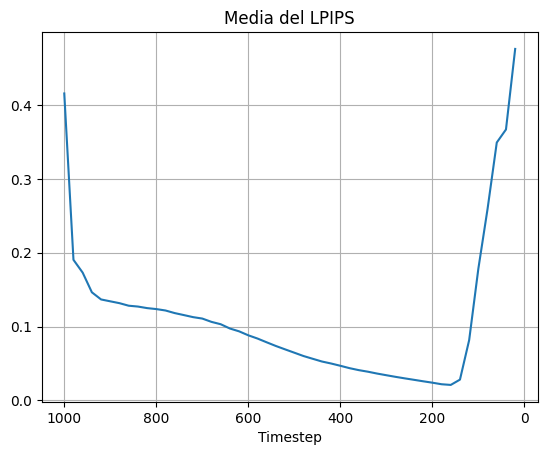

In [22]:
plt.plot(range(len(MSE_distributions*20),0,-20),[x[0] for x in LPIPS_distributions])

plt.title("Media del LPIPS")

plt.xlabel("Timestep")
plt.gca().invert_xaxis()
plt.grid()

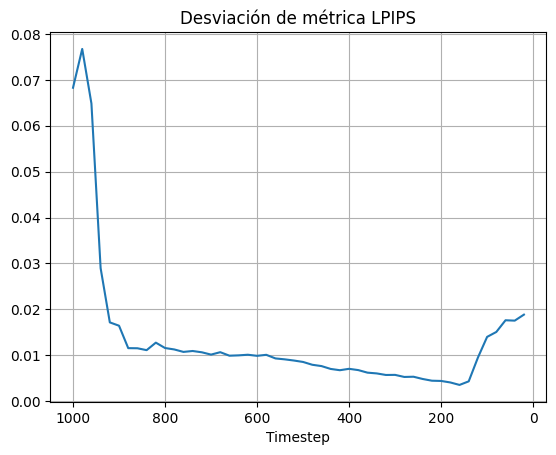

In [23]:
plt.plot(range(len(MSE_distributions*20),0,-20),[x[1] for x in LPIPS_distributions])
plt.title("Desviación de métrica LPIPS")

plt.xlabel("Timestep")
plt.gca().invert_xaxis()
plt.grid()

Finalmente, guardaremos estos valores para usarlos en la detección de OODs

In [78]:
with open("Base_data_distribution.csv","w") as file:

    writer = csv.writer(file)

    for row in MSE_distributions:
        writer.writerow(["MSE_distribution"]+ list(row))

    for row in LPIPS_distributions:
        writer.writerow(["LPIPS_distribution"]+ list(row))